In [13]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pydataset

> Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- $H_0$: the average home sale time is the same for office 1 and office 2
- $H_a$: the average home sale time is smaller for office 1 than office 2

In [2]:
n1 = 40
xbar1 = 90
s1 = 15

n2 = 50
xbar2 = 100
s2 = 20

In [6]:
t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

one_tailed_p = p / 2
one_tailed_p

0.005104926224619695

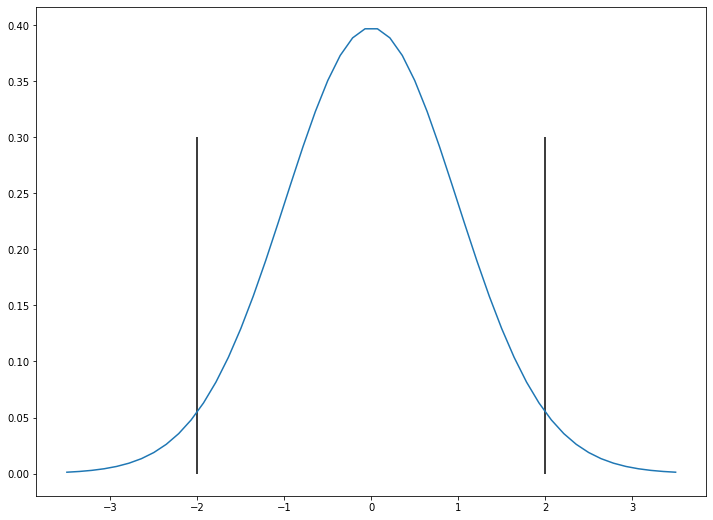

In [17]:
degf = n1 + n2 - 2

dist = stats.t(degf)

x = np.linspace(-3.5, 3.5)
y = dist.pdf(x)

plt.figure(figsize=(12, 9))
plt.plot(x, y)
plt.vlines([-2, 2], 0, .3)

In [12]:
t

-2.6252287036468456

In [11]:
f'{p}'

'0.01020985244923939'

In [9]:
f'{p:.4f}'

'0.0102'

In [7]:
print(f'''
Because p ({p:.4f}) < alpha (.05), we reject the null hypothesis that
the average home sale time is the same for office 1 and office 2.
''')


Because p (0.0102) < alpha (.05), we reject the null hypothesis that
the average home sale time is the same for office 1 and office 2.



In [19]:
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [27]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

t, p = stats.ttest_ind(x1, x2)
print('p =', p)

p = 0.9738110448529322


In [28]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis that there
is no difference in fuel-efficency in cars from 2008 and 1999.
''')


Because p (0.974) > alpha (.05), we fail to reject the null hypothesis that there
is no difference in fuel-efficency in cars from 2008 and 1999.



> Are compact cars more fuel-efficient than the average car?

- $H_0$: there is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
- $H_a$: there is a difference in fuel-efficiency between compact cars and the population average fuel-efficiency

In [41]:
x = mpg[mpg['class'] == 'compact'].hwy
mu = mpg.hwy.mean()

t, p = stats.ttest_1samp(x, mu)
print('t=', t)
print('p=', p)

t= 8.806470666529446
p= 1.9716962312411042e-11


In [40]:
print(f'''
Because p ({p:.12f}) < alpha (.05), we reject the null hypothesis that there is
no difference in fuel-efficiency between compact cars and the overall average.
''')


Because p (0.000000000020) < alpha (.05), we reject the null hypothesis that there is
no difference in fuel-efficiency between compact cars and the overall average.



In [68]:
print(f'''
Avg mileage for compact cars: {x.mean():.2f}
Overall average mileage:      {mu:.2f}
''')


Avg mileage for compact cars: 28.30
Overall average mileage:      23.44



> Do manual cars get better gas milage than automatic cars?

- $H_0$: there is no difference in gas mileage between manual and automatic cars.
- $H_a$: there is a difference in gas mileage between manual and automatic cars.

In [49]:
is_automatic_transmission = mpg.trans.str.startswith('auto')

x1 = mpg[is_automatic_transmission].hwy
x2 = mpg[~ is_automatic_transmission].hwy

t, p = stats.ttest_ind(x2, x1)
print('t=', t)
print('p=', p)

t= 4.368349972819688
p= 1.888044765552951e-05


In [50]:
print(f'''
Becuase p ({p:.5f}) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.
''')


Becuase p (0.00002) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.



In [62]:
mpg['transmission_type'] = np.where(is_automatic_transmission, 'Auto Transmission', 'Manual Transmission')

In [63]:
mpg.groupby('transmission_type').hwy.mean()

transmission_type
Auto Transmission      22.292994
Manual Transmission    25.779221
Name: hwy, dtype: float64

Text(0.5, 1.0, 'Is highway mileage different by transmission type?')

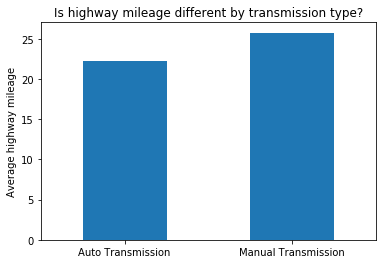

In [67]:
mpg.groupby('transmission_type').hwy.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average highway mileage')
plt.title('Is highway mileage different by transmission type?')

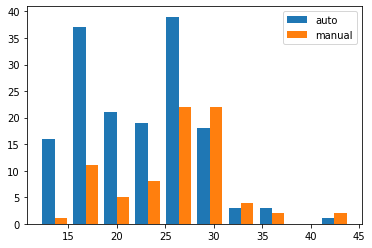

In [65]:
plt.hist([x1, x2], label=['auto', 'manual'])
plt.legend()